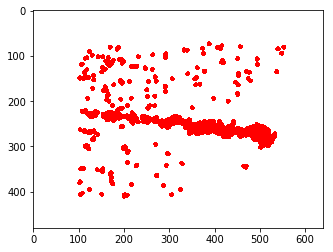

In [34]:
#http://scikit-image.org/docs/dev/auto_examples/xx_applications/plot_coins_segmentation.html
import cv2
#Reading in original image 
original_image = cv2.imread('xy.png')
plt.imshow(original_image)
plt.show()

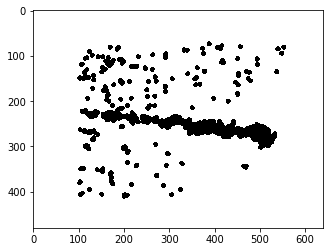

In [35]:
#Converting image to grayscale 
original_image_gray = cv2.cvtColor(original_image,cv2.COLOR_BGR2GRAY)
plt.imshow(original_image_gray, cmap="gray")
plt.show()

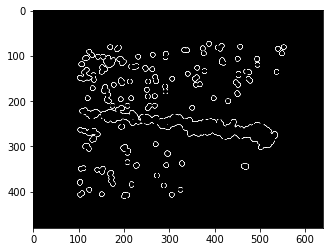

In [36]:
#Creating a sobel elevation map
from skimage.filters import sobel

elevation_map = sobel(original_image_gray)

plt.imshow(elevation_map, cmap=plt.cm.gray, interpolation='nearest')

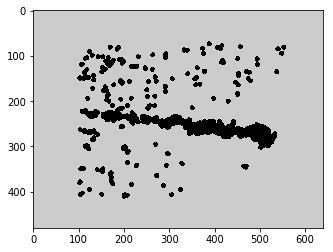

In [37]:
markers = np.zeros_like(original_image_gray)
markers[original_image_gray < 30] = 1
markers[original_image_gray > 150] = 2

plt.imshow(markers, cmap=plt.cm.nipy_spectral, interpolation='nearest')

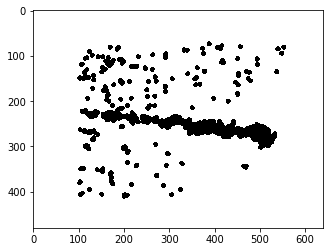

In [38]:
segmentation = morphology.watershed(elevation_map, markers)
plt.imshow(segmentation, cmap=plt.cm.gray, interpolation='nearest')

In [39]:
from skimage.color import label2rgb

segmentation = ndi.binary_fill_holes(segmentation - 1)
labeled_image, _ = ndi.label(segmentation)
image_label_overlay = label2rgb(labeled_image, image=original_image_gray)

/Users/monicaselvaraj/miniconda3/envs/myenv/lib/python3.6/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


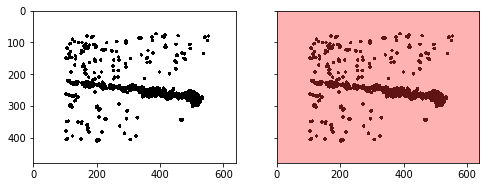

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
axes[0].imshow(original_image_gray, cmap=plt.cm.gray, interpolation='nearest')
axes[0].contour(segmentation, [0.5], linewidths=1.2, colors='y')
axes[1].imshow(image_label_overlay, interpolation='nearest')